# US Baby Names 1880-2010

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. Hadley Wickham, an author of several popular R packages, has often made use of this data set in illustrating data
manipulation in R.

In [100]:
#Import Conventional Libraries
%matplotlib inline

#IPython 3.x and above
#%matplotlib notebook

#older versions
#%matplotlib nbagg

import urllib2
import sys
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import seaborn as sns
import json

In [101]:
names1880 = pd.read_csv('C:/Users/KEVIN/Downloads/pydata-book-master/ch02/names/yob1880.txt', names=['name', 'sex', 'births'])

In [102]:
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [103]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [104]:
# 2010 is the last available year right now
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'C:/Users/KEVIN/Downloads/pydata-book-master/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
    #Concatenate everything into a single DataFrame
    names = pd.concat(pieces, ignore_index=True)

In [105]:
names[:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [106]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [107]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


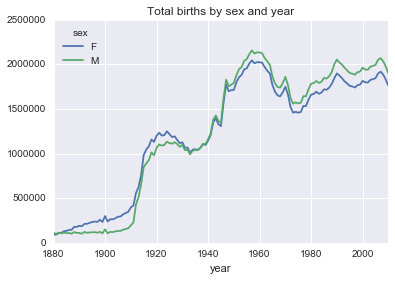

In [108]:
total_births.plot(title = 'Total births by sex and year')

In [109]:
#A prop value of 0.02 would indicate that 2 out of every 100 
#babies was given a particular name. Thus, we group the data by year and sex, then add
#the new column to each group:

def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [110]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
prop      1690784 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 77.4+ MB


In [111]:
names[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [112]:
#verifying that the prop column sums to 1 within all the groups.
#use np.allclose to check that the group sums are sufficiently close to (but
#perhaps not exactly equal to) 1:

np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [113]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [114]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261877 entries, (1880, F, 0) to (2010, M, 1677645)
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.0+ MB


In [115]:
top1000[:5]

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

##Analyzing Naming Trends

With the full data set and Top 1,000 data set in hand, we can start analyzing various
naming trends of interest. Splitting the Top 1,000 names into the boy and girl portions
is easy to do first:

In [116]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [117]:
total_births[:5]

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [118]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A55E4A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000042587BA8>], dtype=object)

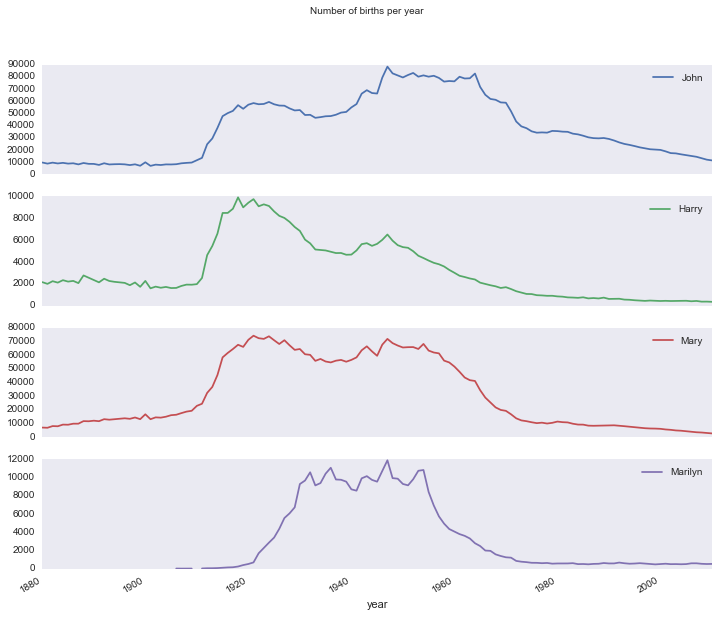

In [119]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

### Measuring the increase in naming diversity

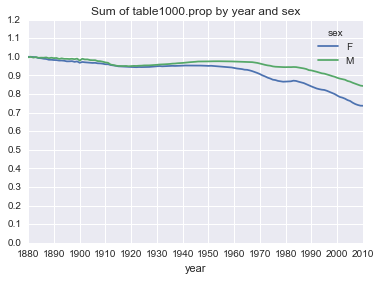

In [120]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [121]:
df = boys[boys.year == 2010]
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (2010, M, 1676644) to (2010, M, 1677645)
Data columns (total 5 columns):
name      1000 non-null object
sex       1000 non-null object
births    1000 non-null int64
year      1000 non-null int64
prop      1000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [122]:
df[:5]

name sex  births  year      prop
year sex                                             
2010 M   1676644    Jacob   M   21875  2010  0.011523
         1676645    Ethan   M   17866  2010  0.009411
         1676646  Michael   M   17133  2010  0.009025
         1676647   Jayden   M   17030  2010  0.008971
         1676648  William   M   16870  2010  0.008887

We want to know how many of the most popular names it takes to reach 50%.

We will use NumPy by taking the cumulative sum, cumsum, of prop then calling the method searchsorted returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order:

In [123]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [124]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [125]:
#will not work according to the book example: prop_cumsum.searchsorted(0.5)
prop_cumsum.values.searchsorted(0.5)

116

In [126]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [127]:
#Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was much smaller:
#will not work according to the book sample: in1900.searchsorted(0.5) + 1
in1900.values.searchsorted(0.5) + 1

25

It should now be fairly straightforward to apply this operation to each year/sex combination;
groupby those fields and apply a function returning the count for each group:

In [128]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [136]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [132]:
diversity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Data columns (total 2 columns):
F    131 non-null object
M    131 non-null object
dtypes: object(2)
memory usage: 3.1+ KB


In [140]:
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [144]:
#below is not included in the book
#a workaround fix. perhaps error in data
diversity=diversity.astype(float)

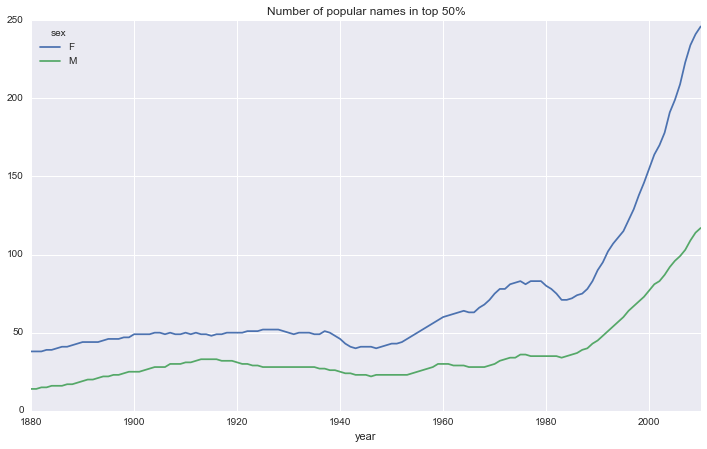

In [154]:
diversity.plot(title='Number of popular names in top 50%', figsize=(12,7))

As you can see, girl names have always been more diverse than boy names, and they
have only become more so over time. Further analysis of what exactly is driving the
diversity, like the increase of alternate spellings, is left to the reader.

### The “Last letter” Revolution

In 2007, a baby name researcher Laura Wattenberg pointed out on her website (http:
//www.babynamewizard.com) that the distribution of boy names by final letter has
changed significantly over the last 100 years. To see this, I first aggregate all of the births
in the full data set by year, sex, and final letter:

In [157]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

Select out three representative years spanning the history and print the first few rows

In [160]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

Normalize the table by total births to compute a new table containing proportion
of total births for each sex ending in each letter:

In [162]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [164]:
letter_prop = subtable / subtable.sum().astype(float)

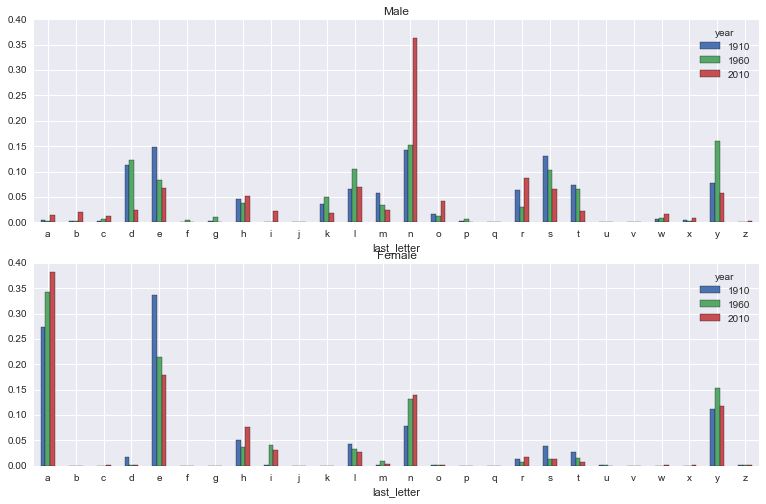

In [176]:
fig, axes = plt.subplots(2, 1, figsize=(13, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=True)

As you can see, boy names ending in “n” have experienced significant growth since the
1960s. Going back to the full table created above, I again normalize by year and sex
and select a subset of letters for the boy names, finally transposing to make each column
a time series:

In [178]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


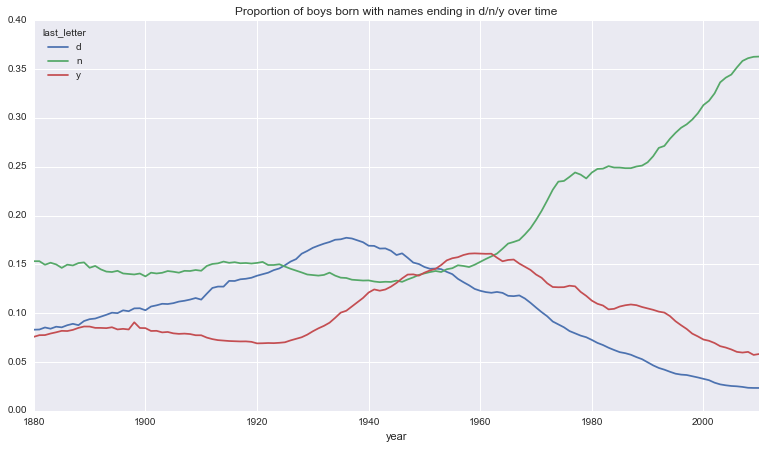

In [183]:
dny_ts.plot(title = "Proportion of boys born with names ending in d/n/y over time", figsize=(13,7))

### Boy names that became girl names (and vice versa)
Another fun trend is looking at boy names that were more popular with one sex earlier
in the sample but have “changed sexes” in the present. One example is the name Lesley
or Leslie. Going back to the top1000 dataset, I compute a list of names occurring in the
dataset starting with 'lesl':

In [188]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]

In [190]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

We can now filter down to just those names and sum births grouped by name
to see the relative frequencies

In [192]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

Let’s aggregate by sex and year and normalize within year:

In [195]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


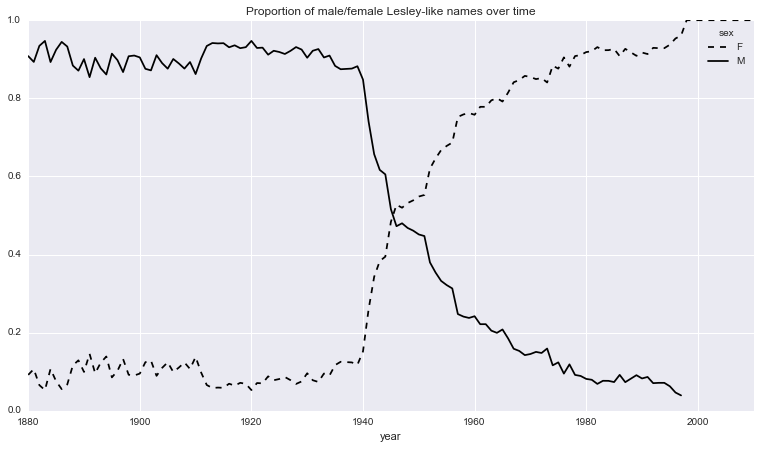

In [198]:
table.plot(title="Proportion of male/female Lesley-like names over time", style={'M': 'k-', 'F': 'k--'}, figsize=(13,7))

## Summary
The samples are rather simple, but they’re here to give you a bit of a
flavor of what sorts of things you can expect in the upcoming projects. The focus of
these topics are on tools as opposed to presenting more sophisticated analytical methods.
Mastering the techniques in these samples will enable you to implement your own analyses
(assuming you know what you want to do!) in short order.